## Column Definitions

1 - age (numeric)

2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5 - default: has credit in default? (categorical: "no","yes","unknown")

6 - housing: has housing loan? (categorical: "no","yes","unknown")

7 - loan: has personal loan? (categorical: "no","yes","unknown")

### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: "cellular","telephone") 

9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)     

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: "yes","no")

## Import Libraries

In [151]:
import pandas as pd
import seaborn as sns
import eli5

from eli5.sklearn import PermutationImportance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier;

## Read Data

In [114]:
df = pd.read_csv(r'C:/Users/mzhang40/data/bank_marketing/bank-additional-full.csv', delimiter=';')
df = df.drop(['duration'], axis=1)

## Pre-Process For Modeling

In [115]:
df_dummy = pd.concat([pd.get_dummies(df.drop(['y'], axis=1)), df.y], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_dummy.drop(['y'], axis=1), df_dummy.y, test_size=0.3, random_state=1)

## Fit Random Forest and Gradient Boosting

In [117]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

logit_model = LogisticRegression(max_iter=1000)
logit_model.fit(X_train, y_train)

RandomForestClassifier()

## Define Functions To Show Feature Importance

In [140]:
def featureImp(model, trainSet, top_n=20):
    feature_imp = pd.Series(data=model.feature_importances_, index=trainSet.columns)[:top_n].sort_values(ascending=False)
    sns.set(rc={'figure.figsize':(11.7, 10)})
    sns.barplot(feature_imp.values, feature_imp.index)
    
def permutationImp(model, X_test, y_test):
    perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
    return eli5.show_weights(perm, feature_names=X_test.columns.tolist())

## Feature Importance by Random Forest

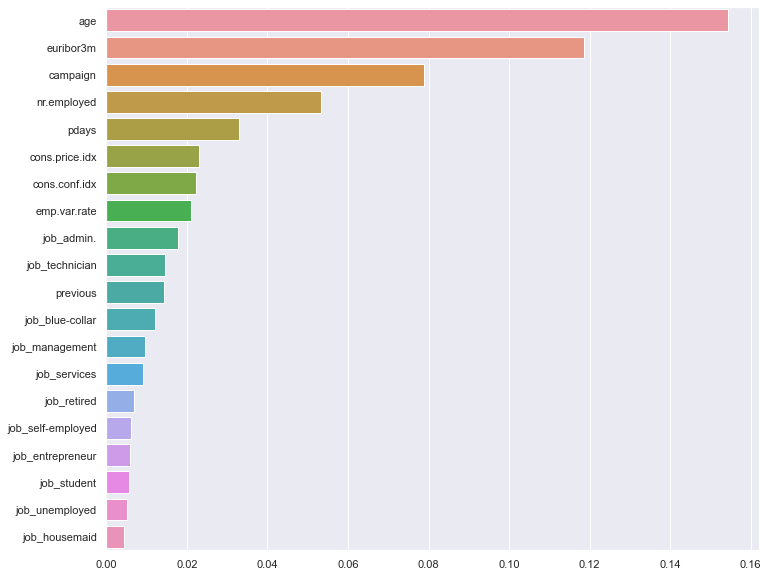

In [136]:
featureImp(rf_model, X_train)

## Feature Importance by GBM

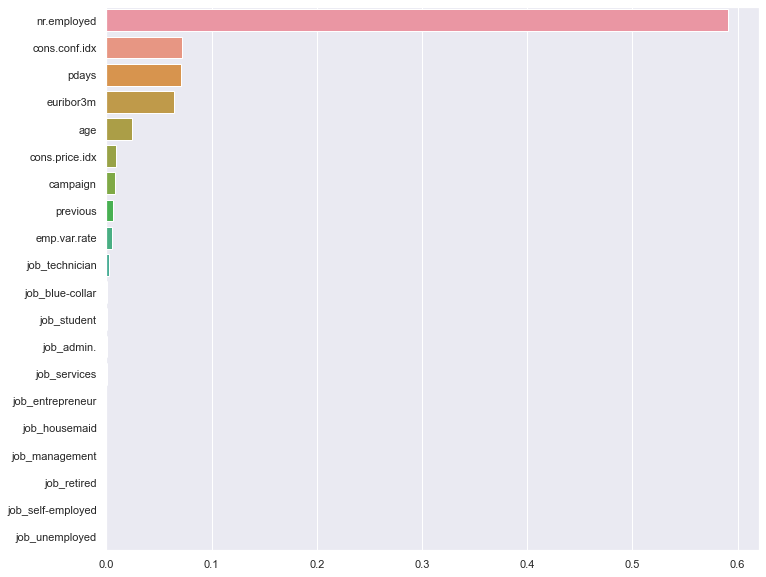

In [137]:
featureImp(gb_model, X_train)

## Permutation Importance by Random Forest

In [141]:
permutationImp(rf_model, X_test, y_test)

Weight,Feature
0.0012 ± 0.0004,pdays
0.0012 ± 0.0007,poutcome_success
0.0010 ± 0.0012,campaign
0.0009 ± 0.0001,month_oct
0.0003 ± 0.0001,month_sep
0.0003 ± 0.0002,poutcome_failure
0.0002 ± 0.0002,education_unknown
0.0002 ± 0.0006,poutcome_nonexistent
0.0002 ± 0.0012,nr.employed
0.0002 ± 0.0000,month_dec


## Permutation Importance by Gradient Boosting

In [142]:
permutationImp(gb_model, X_test, y_test)

Weight,Feature
0.0104 ± 0.0005,nr.employed
0.0079 ± 0.0012,month_oct
0.0028 ± 0.0009,euribor3m
0.0027 ± 0.0014,pdays
0.0014 ± 0.0005,poutcome_success
0.0012 ± 0.0003,campaign
0.0011 ± 0.0005,poutcome_failure
0.0010 ± 0.0010,day_of_week_mon
0.0006 ± 0.0006,contact_telephone
0.0005 ± 0.0002,job_student


## Permutation Importance by Logistic Regression

In [150]:
permutationImp(logit_model, X_test, y_test)

Weight,Feature
0.0129 ± 0.0019,pdays
0.0079 ± 0.0016,nr.employed
0.0022 ± 0.0006,euribor3m
0.0019 ± 0.0017,emp.var.rate
0.0017 ± 0.0012,cons.price.idx
0.0009 ± 0.0007,month_may
0.0008 ± 0.0006,contact_cellular
0.0007 ± 0.0010,contact_telephone
0.0006 ± 0.0005,education_university.degree
0.0005 ± 0.0003,campaign
